In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from os import path

import torch
import gpytorch
import botorch

import data


In [2]:
doe, process_results, dimension_res = data.load_data()

In [3]:

doe.head()

,batch,layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time
0,1,170.950131,1967.331486,78.906433,4.325408,195.740100,8.975193,57.789017,59.215849,4.682984
1,2,218.833816,2059.599336,61.607811,3.001314,277.268534,16.391061,59.744374,89.594092,9.374743
2,3,129.909640,1937.495407,43.603111,5.855950,169.602720,19.940300,39.618434,80.671603,8.926232
3,4,141.806415,1871.663699,90.385153,17.915776,160.335560,11.752588,71.820288,91.839952,9.035047
4,5,125.986854,2112.279386,52.067637,11.647734,265.095430,17.432956,57.658267,67.618446,5.008873


In [4]:
process_results.head()

,batch,layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,porosity
0,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,37.186165
1,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,37.015250
2,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,38.274587
3,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,38.939576
4,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,37.315198


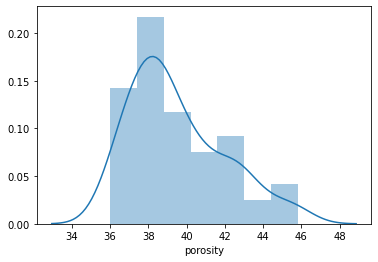

In [5]:
sns.distplot(process_results['porosity'])
plt.show()

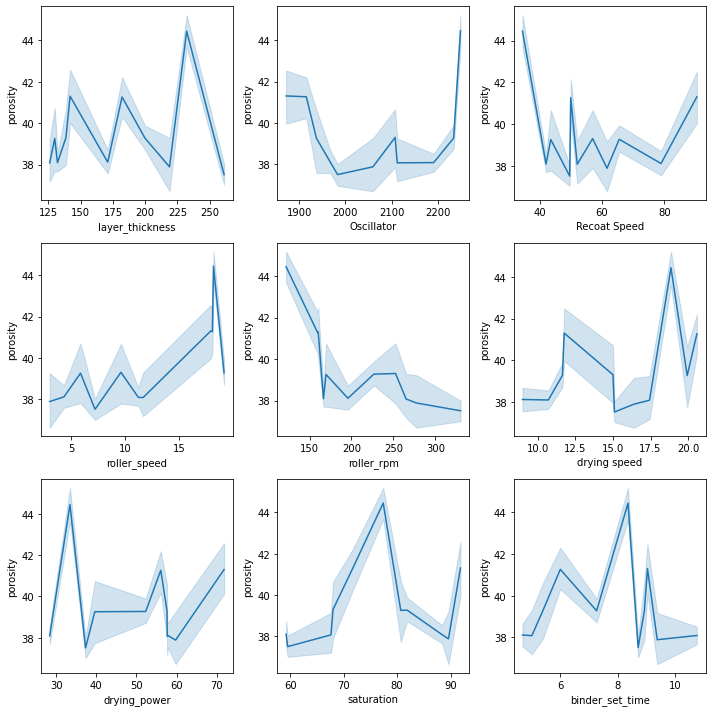

In [6]:
param_list = ['layer_thickness','Oscillator','Recoat Speed','roller_speed','roller_rpm','drying speed','drying_power','saturation','binder_set_time']

fig, axes = plt.subplots(3,3, figsize = (10,10))
for p, a in zip(param_list, axes.flatten()):
    g = sns.lineplot(x = p, y='porosity', data = process_results, ax = a)
plt.tight_layout()


In [7]:
param_list = ['layer_thickness','Oscillator','Recoat Speed','roller_speed','roller_rpm','drying speed','drying_power','saturation','binder_set_time']
mean_porosity = process_results.groupby(param_list).mean().drop('batch', axis = 1)
mean_porosity

,,,,,,,,,porosity
layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,
125.986854,2112.279386,52.067637,11.647734,265.095430,17.432956,57.658267,67.618446,5.008873,38.078613
129.909640,1937.495407,43.603111,5.855950,169.602720,19.940300,39.618434,80.671603,8.926232,39.260726
132.045855,2191.071114,42.085086,11.207913,166.566982,10.699830,28.378491,88.389223,10.755372,38.089703
138.600000,2107.700000,57.000000,9.600000,252.500000,15.000000,57.600000,68.000000,5.400000,39.304046
141.806415,1871.663699,90.385153,17.915776,160.335560,11.752588,71.820288,91.839952,9.035047,41.306077
170.950131,1967.331486,78.906433,4.325408,195.740100,8.975193,57.789017,59.215849,4.682984,38.113427
182.054056,1915.419886,49.989358,18.063779,159.688379,20.584630,56.055525,71.634277,6.000027,41.267232
199.844960,2234.452147,65.517652,19.146047,226.675309,11.635889,52.300589,81.859788,7.265524,39.273990
218.833816,2059.599336,61.607811,3.001314,277.268534,16.391061,59.744374,89.594092,9.374743,37.886247


In [8]:
std_porosity = process_results.groupby(param_list).std().drop('batch', axis = 1)
std_porosity

,,,,,,,,,porosity
layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,
125.986854,2112.279386,52.067637,11.647734,265.095430,17.432956,57.658267,67.618446,5.008873,1.705902
129.909640,1937.495407,43.603111,5.855950,169.602720,19.940300,39.618434,80.671603,8.926232,2.041827
132.045855,2191.071114,42.085086,11.207913,166.566982,10.699830,28.378491,88.389223,10.755372,0.649218
138.600000,2107.700000,57.000000,9.600000,252.500000,15.000000,57.600000,68.000000,5.400000,2.128452
141.806415,1871.663699,90.385153,17.915776,160.335560,11.752588,71.820288,91.839952,9.035047,1.852866
170.950131,1967.331486,78.906433,4.325408,195.740100,8.975193,57.789017,59.215849,4.682984,0.882621
182.054056,1915.419886,49.989358,18.063779,159.688379,20.584630,56.055525,71.634277,6.000027,1.514470
199.844960,2234.452147,65.517652,19.146047,226.675309,11.635889,52.300589,81.859788,7.265524,0.915408
218.833816,2059.599336,61.607811,3.001314,277.268534,16.391061,59.744374,89.594092,9.374743,1.949746


In [9]:
dimension_res.head()

,batch,layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,x_dev,y_dev,z_dev
0,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,0.68,0.52,0.49
1,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,0.64,0.61,0.34
2,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,0.68,0.47,0.47
3,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,0.99,0.72,0.46
4,1,170.950131,1967.331486,78.906433,4.325408,195.7401,8.975193,57.789017,59.215849,4.682984,0.67,0.41,0.44


In [10]:
mean_dim = dimension_res.groupby(param_list).mean().drop('batch', axis = 1)
mean_dim.head()

,,,,,,,,,x_dev,y_dev,z_dev
layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,,,
125.986854,2112.279386,52.067637,11.647734,265.095430,17.432956,57.658267,67.618446,5.008873,0.75875,0.6750,0.62250
129.909640,1937.495407,43.603111,5.855950,169.602720,19.940300,39.618434,80.671603,8.926232,2.01125,1.0900,0.70875
132.045855,2191.071114,42.085086,11.207913,166.566982,10.699830,28.378491,88.389223,10.755372,1.29000,0.9675,0.75875
138.600000,2107.700000,57.000000,9.600000,252.500000,15.000000,57.600000,68.000000,5.400000,1.94875,2.1250,1.18625
141.806415,1871.663699,90.385153,17.915776,160.335560,11.752588,71.820288,91.839952,9.035047,1.09375,0.7650,1.12125


In [11]:
std_dim = dimension_res.groupby(param_list).std().drop('batch', axis = 1)
std_dim.head()

,,,,,,,,,x_dev,y_dev,z_dev
layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,,,
125.986854,2112.279386,52.067637,11.647734,265.095430,17.432956,57.658267,67.618446,5.008873,0.249996,0.081591,0.331996
129.909640,1937.495407,43.603111,5.855950,169.602720,19.940300,39.618434,80.671603,8.926232,2.070862,0.433359,0.364238
132.045855,2191.071114,42.085086,11.207913,166.566982,10.699830,28.378491,88.389223,10.755372,0.585662,0.259161,0.183804
138.600000,2107.700000,57.000000,9.600000,252.500000,15.000000,57.600000,68.000000,5.400000,0.336598,0.526145,0.103639
141.806415,1871.663699,90.385153,17.915776,160.335560,11.752588,71.820288,91.839952,9.035047,0.873808,0.151186,0.172580


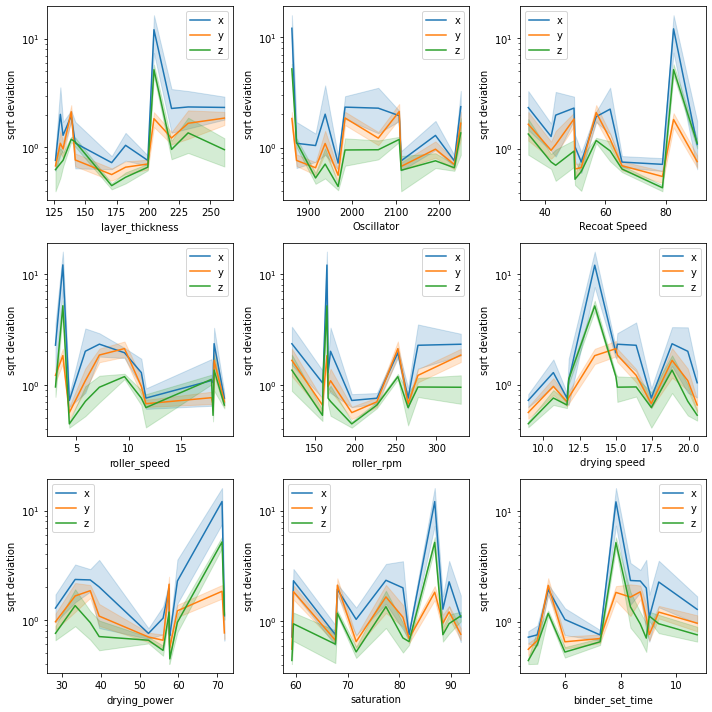

In [12]:
fig, axes = plt.subplots(3,3, figsize = (10,10))
for p, a in zip(param_list, axes.flatten()):
    sns.lineplot(x = dimension_res[p], y = dimension_res['x_dev'], ax = a, label = 'x')
    sns.lineplot(x = dimension_res[p], y = dimension_res['y_dev'], ax = a, label = 'y')
    sns.lineplot(x = dimension_res[p], y = dimension_res['z_dev'], ax = a, label = 'z')
    a.set(yscale = 'log', ylabel = 'sqrt deviation')
plt.legend()
plt.tight_layout()

In [13]:
print_time = doe.merge(pd.read_excel(path.join(path.join('.','data'), 'printing_time.xlsx'),
                    header = 0), how='left', on='batch')
print_time.head()

,batch,layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,time
0,1,170.950131,1967.331486,78.906433,4.325408,195.740100,8.975193,57.789017,59.215849,4.682984,92
1,2,218.833816,2059.599336,61.607811,3.001314,277.268534,16.391061,59.744374,89.594092,9.374743,101
2,3,129.909640,1937.495407,43.603111,5.855950,169.602720,19.940300,39.618434,80.671603,8.926232,115
3,4,141.806415,1871.663699,90.385153,17.915776,160.335560,11.752588,71.820288,91.839952,9.035047,78
4,5,125.986854,2112.279386,52.067637,11.647734,265.095430,17.432956,57.658267,67.618446,5.008873,74


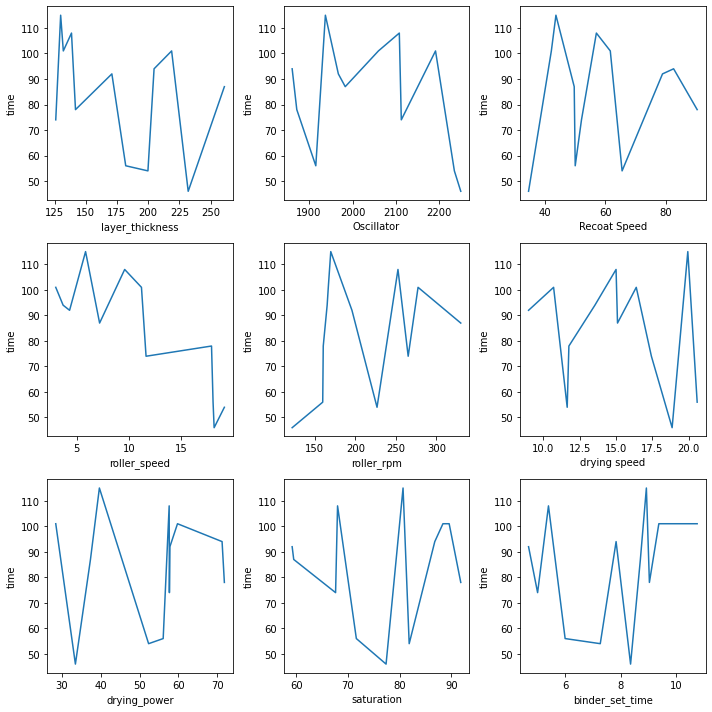

In [14]:
fig, axes = plt.subplots(3,3, figsize = (10,10))
for p, a in zip(param_list, axes.flatten()):
    g = sns.lineplot(x = p, y='time', data = print_time, ax = a)
plt.tight_layout()

In [15]:
from botorch.models.transforms import Standardize
from botorch.models.transforms.input import Normalize

bounds = torch.tensor([[100, 270],
          [1500, 2500],
          [30, 95],
          [2.9, 20],
          [120,350],
          [8, 21],
          [20, 80],
          [50, 100],
          [3, 15]]).double().T


x_tf = Normalize(bounds.shape[1], bounds)
x_tf.eval()

Normalize()

In [16]:
X_train_por = x_tf(torch.tensor(process_results.iloc[:,1:10].to_numpy()))
Y_train_por = torch.from_numpy(process_results['porosity'].to_numpy()).unsqueeze(1)

In [17]:
X_train_dim = x_tf(torch.tensor(dimension_res.iloc[:,1:10].to_numpy()))
Y_train_dim = torch.from_numpy(dimension_res.iloc[:,-3:].to_numpy())

In [18]:
X_train_time = x_tf(torch.tensor(print_time.iloc[:,1:10].to_numpy()))
Y_train_time = torch.from_numpy(print_time['time'].to_numpy()).unsqueeze(1).double()

In [19]:
baseline = pd.merge(mean_dim, mean_porosity, how = 'inner', on = param_list).dropna().reset_index()
baseline = pd.merge(baseline, print_time, how = 'inner', on = param_list).dropna().drop(['batch'], axis = 1).reset_index()

baseline.head()

,index,layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,x_dev,y_dev,z_dev,porosity,time
0,0,125.986854,2112.279386,52.067637,11.647734,265.095430,17.432956,57.658267,67.618446,5.008873,0.75875,0.6750,0.62250,38.078613,74
1,1,129.909640,1937.495407,43.603111,5.855950,169.602720,19.940300,39.618434,80.671603,8.926232,2.01125,1.0900,0.70875,39.260726,115
2,2,132.045855,2191.071114,42.085086,11.207913,166.566982,10.699830,28.378491,88.389223,10.755372,1.29000,0.9675,0.75875,38.089703,101
3,3,138.600000,2107.700000,57.000000,9.600000,252.500000,15.000000,57.600000,68.000000,5.400000,1.94875,2.1250,1.18625,39.304046,108
4,4,141.806415,1871.663699,90.385153,17.915776,160.335560,11.752588,71.820288,91.839952,9.035047,1.09375,0.7650,1.12125,41.306077,78


Create model

In [20]:
from gpytorch.mlls import SumMarginalLogLikelihood
from botorch.models.transforms.outcome import Standardize, Log
from botorch.models.gp_regression import SingleTaskGP
from botorch.models.model_list_gp_regression import ModelListGP
from botorch.fit import fit_gpytorch_model

model_porosity = SingleTaskGP(X_train_por, Y_train_por, outcome_transform=Standardize(m=1))

model_dim = [SingleTaskGP(X_train_dim, Y_train_dim[:,i].unsqueeze(1), outcome_transform=Standardize(m=1)) for i in range(Y_train_dim.shape[-1])]
model_time = SingleTaskGP(X_train_time, Y_train_time, outcome_transform=Standardize(m=1))
full_model = ModelListGP(model_porosity, model_time, *model_dim)

mll = SumMarginalLogLikelihood(full_model.likelihood, full_model)
fit_gpytorch_model(mll)


SumMarginalLogLikelihood(
  (likelihood): LikelihoodList(
    (likelihoods): ModuleList(
      (0): GaussianLikelihood(
        (noise_covar): HomoskedasticNoise(
          (noise_prior): GammaPrior()
          (raw_noise_constraint): GreaterThan(1.000E-04)
        )
      )
      (1): GaussianLikelihood(
        (noise_covar): HomoskedasticNoise(
          (noise_prior): GammaPrior()
          (raw_noise_constraint): GreaterThan(1.000E-04)
        )
      )
      (2): GaussianLikelihood(
        (noise_covar): HomoskedasticNoise(
          (noise_prior): GammaPrior()
          (raw_noise_constraint): GreaterThan(1.000E-04)
        )
      )
      (3): GaussianLikelihood(
        (noise_covar): HomoskedasticNoise(
          (noise_prior): GammaPrior()
          (raw_noise_constraint): GreaterThan(1.000E-04)
        )
      )
      (4): GaussianLikelihood(
        (noise_covar): HomoskedasticNoise(
          (noise_prior): GammaPrior()
          (raw_noise_constraint): GreaterThan(1.000

Below is the Multiobjective Optimization

In [21]:
from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler
from botorch.optim.optimize import optimize_acqf, optimize_acqf_list
from botorch.acquisition.objective import GenericMCObjective
from botorch.utils.multi_objective.scalarization import get_chebyshev_scalarization
from botorch.utils.sampling import sample_simplex


N_BATCH = 5
MC_SAMPLES = 512
baseline_x = x_tf(torch.tensor(baseline.iloc[:, 1:10].to_numpy()))
baseline_y = torch.tensor(
    [
        baseline['porosity'].values.tolist(),
        baseline['time'].values.tolist(),
        baseline['x_dev'].values.tolist(),
        baseline['y_dev'].values.tolist(),
        baseline['z_dev'].values.tolist()
    ]
).T

standard_bounds = torch.cat([torch.zeros(9).unsqueeze(0), torch.ones(9).unsqueeze(0)], axis = 0)

acq_func_list = []
for it in tqdm(range(N_BATCH)):
    qmc_sampler = SobolQMCNormalSampler(num_samples=MC_SAMPLES)

    weights = sample_simplex(baseline_y.shape[-1]).squeeze()
    objective = GenericMCObjective(get_chebyshev_scalarization(weights=weights, Y= baseline_y))

    qNEI = qNoisyExpectedImprovement(
            model=full_model, 
            X_baseline= baseline_x,
            sampler=qmc_sampler, 
            objective=objective
        )

    acq_func_list.append(qNEI)


candidates, pred_score = optimize_acqf_list(
    acq_function_list=acq_func_list,
    bounds=standard_bounds,
    num_restarts=100,
    raw_samples=2048,
    options={"batch_limit": 5, "maxiter": 200},
)

100%|██████████| 5/5 [00:00<00:00, 11.39it/s]


In [32]:
pred_y = full_model.posterior(candidates.detach(), observation_noise=True)
unormed_cand = x_tf.untransform(candidates)

lower, upper = pred_y.mvn.confidence_region()

new_pt = torch.cat([unormed_cand, lower], axis = 1).detach().numpy()

Generate possible print settings

In [33]:
df_pt = pd.DataFrame(data = new_pt, columns=param_list + ['porosity','time','x_dev','y_dev','z_dev']).round(2)
df_pt

,layer_thickness,Oscillator,Recoat Speed,roller_speed,roller_rpm,drying speed,drying_power,saturation,binder_set_time,porosity,time,x_dev,y_dev,z_dev
0,204.18,1860.42,82.54,3.80,164.15,13.59,71.31,86.94,7.85,34.15,70.40,6.91,1.03,4.25
1,211.98,1847.10,84.39,2.90,165.10,13.29,72.14,87.12,7.83,34.15,66.14,6.25,0.91,3.84
2,188.47,1877.31,79.98,3.42,162.44,13.68,71.40,87.32,7.84,34.15,66.32,5.56,0.88,3.44
3,217.12,1847.34,84.30,6.00,161.20,13.54,71.32,86.83,7.86,34.23,56.66,4.28,0.71,2.87
4,200.82,1836.94,87.37,4.10,174.99,13.97,70.91,86.49,7.71,34.16,66.15,5.70,0.82,3.50
